Imports

In [73]:
from pathlib import Path
import importlib
from collections import defaultdict
import time

import numpy as np
import pandas as pd
import scipy
from scipy.stats import pearsonr

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import pyBigWig
import pysam

from Modules import utils, plot_utils

Global variables

In [133]:
importlib.reload(utils)
importlib.reload(plot_utils)
data_dir = '../shared_folder'
writing_dir = '../shared_folder'
# writing_dir='../'
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
# plt.rcParams.update({'axes.labelsize': 16})
# sns.set()

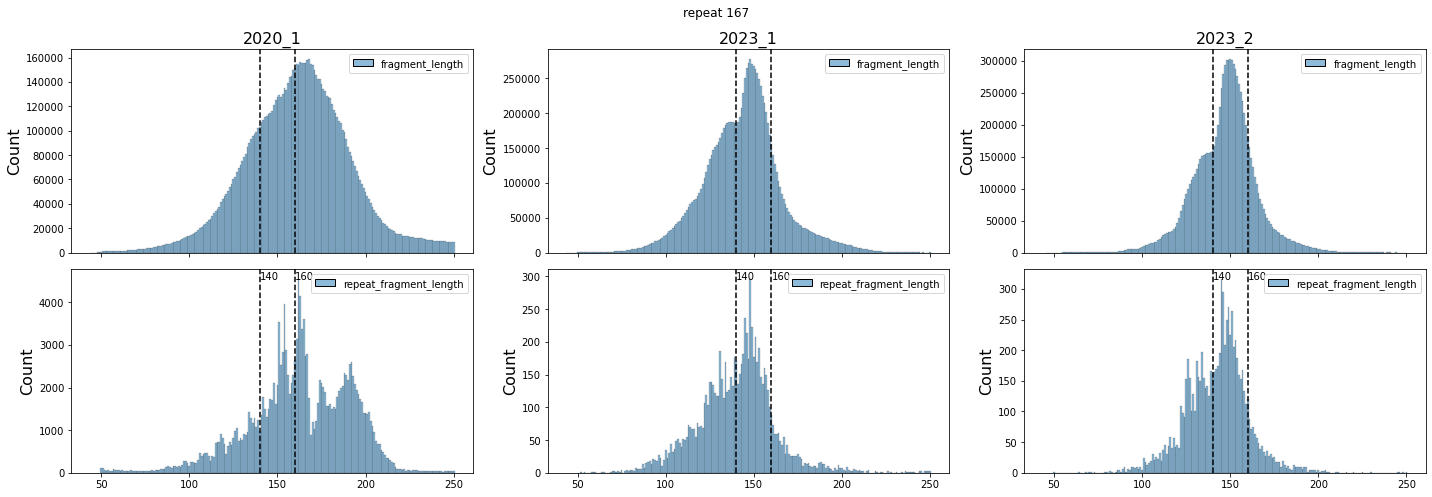

In [10]:
file_list = ['MNases_06_2020/NG-25315_167_1_lib406963_6879_2_101bp_max250',
             'MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_101bp_max250',
             'MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_101bp_max250']
titles = ['2020_1', '2023_1', '2023_2']
fig, axes = plt.subplots(2, len(file_list), sharex=True, figsize=(20, 7), facecolor='w', layout='tight')
fig.suptitle('repeat 167')
vlines = [140, 160]
for i, filename in enumerate(file_list):
    ix, iy = 0, i  # i // 2, i % 2  #
    fraglens = pd.read_csv(f'/home/alex/shared_folder/JB_seqdes/Projet_Julien/{filename}.sorted.bam.insert_sizes.txt', header=None)
    repfraglens = pd.read_csv(f'/home/alex/shared_folder/JB_seqdes/Projet_Julien/{filename}.sorted.bam.repeat_insert_sizes.txt', header=None)
    fraglens.columns = ['fragment_length']
    repfraglens.columns = ['repeat_fragment_length']
    sns.histplot(fraglens, discrete=True, ax=axes[0 + 2*ix, iy])
    g = sns.histplot(repfraglens, discrete=True, ax=axes[1 + 2*ix, iy])
    for v in vlines:
        axes[0 + ix*2, iy].axvline(x=v, color='k', linestyle='--')
        axes[1 + ix*2, iy].axvline(x=v, color='k', linestyle='--')
        axes[1 + ix*2, iy].annotate(str(v), xy=(v, 0.95), xycoords=('data', 'axes fraction'))
    axes[0 + ix*2, iy].set_title(titles[i], fontsize=16)

In [63]:
TOTALS = {}
def load_CPM(filename):
    bw = utils.load_bw(filename)
    tot = sum(np.sum(arr) for arr in bw.values())
    global TOTALS
    TOTALS[filename] = tot
    print(f'{int(tot)} in {filename}')
    return {k: v * 1e6 / tot for k, v in bw.items()}

In [64]:
mnase2020_167 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_paired.bw')
mnase2020_197a = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_paired.bw')
mnase2020_197b = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_paired.bw')
mnase2020_237_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_paired.bw')
mnase2020_237_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_paired.bw')

mnase2022_237sansD_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_paired.bw')
mnase2022_237sansD_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_paired.bw')
mnase2022_237D10_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_paired.bw')
mnase2022_237D10_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_paired.bw')
mnase2022_237D50_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_paired.bw')
mnase2022_237D50_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_paired.bw')

mnase2023_167_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_paired.bw')
mnase2023_167_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_paired.bw')
mnase2023_197a_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_paired.bw')
mnase2023_197a_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_paired.bw')
mnase2023_197b_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_paired.bw')
mnase2023_197b_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_paired.bw')
mnase2023_237_1 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_paired.bw')
mnase2023_237_2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_paired.bw')

rna2022_167 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_167_replacement_sample_lib568677_7920_2_paired.bw')
rna2022_197a = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_1_lib556538_7886_1_paired.bw')
rna2022_197b = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_197_2_lib556539_7886_1_paired.bw')
rna2022_237 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29104_237_lib556540_7886_1_paired.bw')
rna2022_237sansD = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237sansD_lib587179_8045_2_paired.bw')
rna2022_237D = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_03_2022/NG-29820_237D_lib587178_8045_2_paired.bw')

rna2023_167 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_167_4_lib717029_10297_1_paired.bw')
rna2023_197a = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_1_22_lib717030_10297_1_paired.bw')
rna2023_197b = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_197_2_27_lib717031_10297_1_paired.bw')
rna2023_237 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/RNAseq_08_2023/NG-34139_237_44_lib717032_10297_1_paired.bw')

3922667667 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_paired.bw
5379585421 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_paired.bw
5604809641 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_paired.bw
84907600 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_paired.bw
2965695787 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_paired.bw
3652156693 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_paired.bw
2054111504 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_paired.bw
2264885794 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_paired.bw
2026414282 in /home/alex/shared_folder/J

In [65]:
mnase2020_167_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_101bp_max250.bw')
mnase2020_197a_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_101bp_max250.bw')
mnase2020_197b_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_101bp_max250.bw')
mnase2020_237_1_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_101bp_max250.bw')
mnase2020_237_2_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_101bp_max250.bw')

mnase2022_237sansD_1_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_101bp_max250.bw')
mnase2022_237sansD_2_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_101bp_max250.bw')
mnase2022_237D10_1_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_101bp_max250.bw')
mnase2022_237D10_2_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_101bp_max250.bw')
mnase2022_237D50_1_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_101bp_max250.bw')
mnase2022_237D50_2_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_101bp_max250.bw')

mnase2023_167_1_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_101bp_max250.bw')
mnase2023_167_2_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_101bp_max250.bw')
mnase2023_197a_1_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_101bp_max250.bw')
mnase2023_197a_2_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_101bp_max250.bw')
mnase2023_197b_1_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_101bp_max250.bw')
mnase2023_197b_2_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_101bp_max250.bw')
mnase2023_237_1_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_101bp_max250.bw')
mnase2023_237_2_v2 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_101bp_max250.bw')

4057499255 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_101bp_max250.bw
5401584019 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_101bp_max250.bw
5588811437 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_101bp_max250.bw
86190733 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_101bp_max250.bw
2947188533 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_101bp_max250.bw
3533339521 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_101bp_max250.bw
2034962195 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_101bp_max250.bw
2218938136 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_101bp_ma

In [66]:
mnase2020_167_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_101bp_max250_140-160.bw')
mnase2020_197a_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_101bp_max250_140-160.bw')
mnase2020_197b_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_101bp_max250_140-160.bw')
mnase2020_237_1_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_101bp_max250_140-160.bw')
mnase2020_237_2_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_101bp_max250_140-160.bw')

mnase2022_237sansD_1_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_101bp_max250_140-160.bw')
mnase2022_237sansD_2_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_101bp_max250_140-160.bw')
mnase2022_237D10_1_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_101bp_max250_140-160.bw')
mnase2022_237D10_2_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_101bp_max250_140-160.bw')
mnase2022_237D50_1_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_101bp_max250_140-160.bw')
mnase2022_237D50_2_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_101bp_max250_140-160.bw')

mnase2023_167_1_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_101bp_max250_140-160.bw')
mnase2023_167_2_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_101bp_max250_140-160.bw')
mnase2023_197a_1_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_101bp_max250_140-160.bw')
mnase2023_197a_2_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_101bp_max250_140-160.bw')
mnase2023_197b_1_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_101bp_max250_140-160.bw')
mnase2023_197b_2_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_101bp_max250_140-160.bw')
mnase2023_237_1_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_101bp_max250_140-160.bw')
mnase2023_237_2_v3 = load_CPM('/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_101bp_max250_140-160.bw')

797260597 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_101bp_max250_140-160.bw
2143914923 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_101bp_max250_140-160.bw
1470846436 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_101bp_max250_140-160.bw
13342566 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_101bp_max250_140-160.bw
448675368 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_101bp_max250_140-160.bw
846041119 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_101bp_max250_140-160.bw
507820565 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_101bp_max250_140-160.bw
541008528 in /home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_

In [72]:
filename = Path(list(TOTALS.keys())[0])
filename.stem, filename.parent.name

('NG-25315_167_1_lib406963_6879_2_paired', 'MNases_06_2020')

In [115]:
import re
r2020 = re.compile('[\S]*(167|1971|1972|237)[\S]*(.)(_101bp[\S]*|_paired)$')
r2022 = re.compile('[\S]*(237[^_]*)_(.)[\S]*(_101bp[\S]*|_paired)$')
r2023 = re.compile('[\S]*(167|197_1|197_2|237)_[^_]*_(.)[\S]*(_101bp[\S]*|_paired)$')
rrna = re.compile('[\S]*(167|197_1|197_2|237[^_]*)[\S]*(_101bp[\S]*|_paired)$')
re_dict = {'MNases_06_2020': r2020,
           'MNase_03_2022': r2022,
           'MNase_08_2023': r2023,
           'RNAseq_03_2022': rrna,
           'RNAseq_08_2023': rrna}
# m = re.search(rrna, 'NG-29820_237sansD_lib587179_8045_2_paired')
# m.groups()

In [119]:
cov_dict = defaultdict(lambda: defaultdict(dict))
for filename, total in TOTALS.items():
    f = Path(filename)
    dirname = f.parent.name
    r = re_dict[dirname]
    grps = re.search(r, f.stem).groups()
    if dirname[:3] == 'RNA':
        prefix, suffix = grps
    else:
        prefix, repl, suffix = grps
        prefix = prefix + '_' + repl
    if suffix == '_paired':
        suffix = 'v1'
    elif suffix == '_101bp_max250':
        suffix = 'v2'
    else:
        suffix = 'v2_140-160'
    cov_dict[dirname][prefix][suffix] = int(total)
cov_dict

defaultdict(<function __main__.<lambda>()>,
            {'MNases_06_2020': defaultdict(dict,
                         {'167_2': {'v1': 3922667667,
                           'v2': 4057499255,
                           'v2_140-160': 797260597},
                          '1971_1': {'v1': 5379585421,
                           'v2': 5401584019,
                           'v2_140-160': 2143914923},
                          '1972_1': {'v1': 5604809641,
                           'v2': 5588811437,
                           'v2_140-160': 1470846436},
                          '237_1': {'v1': 84907600,
                           'v2': 86190733,
                           'v2_140-160': 13342566},
                          '237_2': {'v1': 2965695787,
                           'v2': 2947188533,
                           'v2_140-160': 448675368}}),
             'MNase_03_2022': defaultdict(dict,
                         {'237_1': {'v1': 3652156693,
                           'v2': 3533339521,

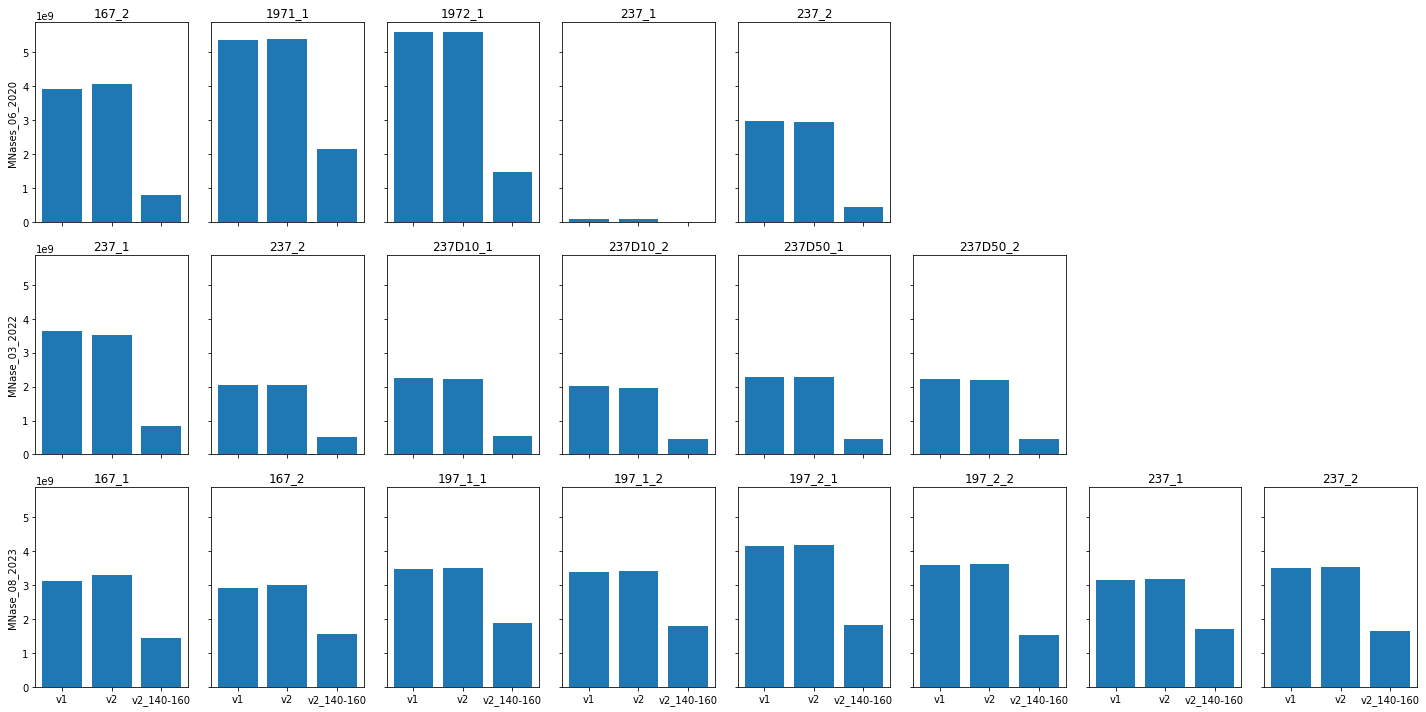

In [139]:
fig, axes = plt.subplots(3, 8, figsize=(20, 10), facecolor='w', layout='tight', sharey=True, sharex=True)
for i, dirname in enumerate(cov_dict.keys()):
    if i >= 3:
        break
    axes[i, 0].set_ylabel(dirname)
    for j, (f_key, f_cov_dict) in enumerate(cov_dict[dirname].items()):
        axes[i, j].bar(list(f_cov_dict.keys()), list(f_cov_dict.values()))
        axes[i, j].set_title(f_key)
    while j < 7:
        j += 1
        axes[i, j].set_axis_off()

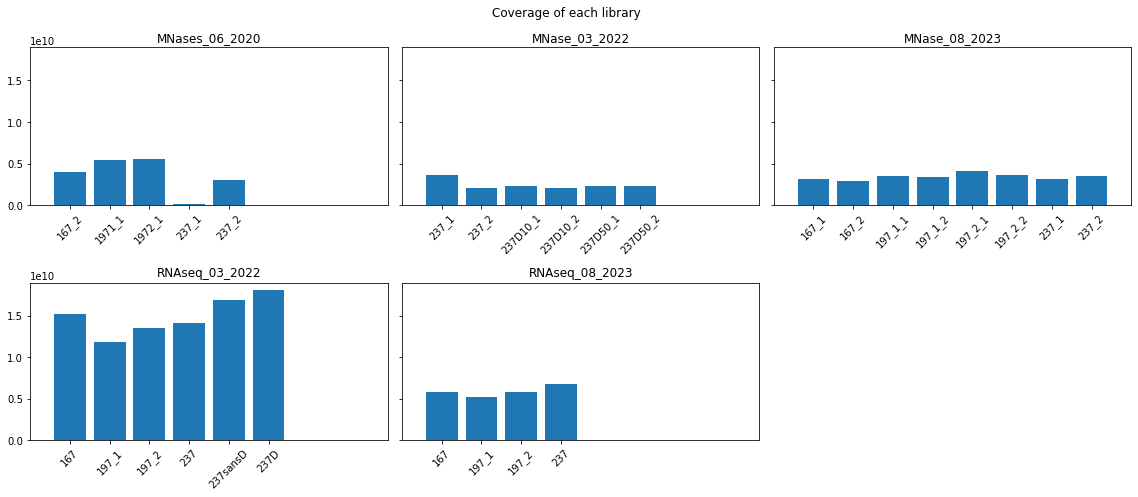

In [159]:
fig, axes = plt.subplots(2, 3, figsize=(16, 7), facecolor='w', layout='tight', sharey=True)
fig.suptitle('Coverage of each library')
for ax, dirname in zip(axes.flatten(), cov_dict.keys()):
    ax.set_title(dirname)
    ax.bar(cov_dict[dirname].keys(), [d['v1'] for d in cov_dict[dirname].values()])
    ax.set_xlim((-1, 8))
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
axes[1, 2].set_axis_off()

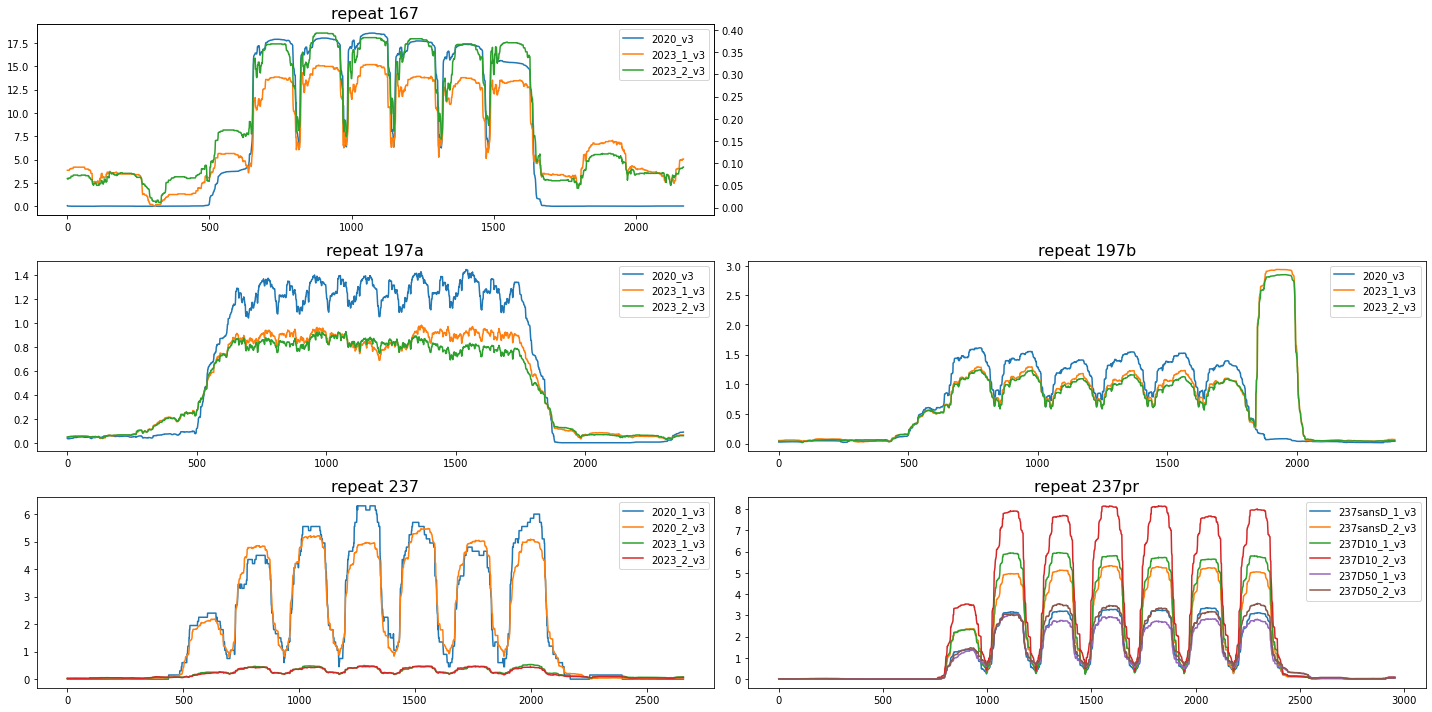

In [26]:
start = 3500
stop = -3500

fig, axes = plt.subplots(3, 2, figsize=(20, 10), facecolor='w', layout='tight')

axes[0, 0].set_title('repeat 167', fontsize=16)
col_idx = 0
axes[0, 0].plot(mnase2020_167_v3['167_7_4kbrf'][start:stop], label='2020_v3') ; col_idx += 1
ax0 = axes[0, 0].twinx()
ax0.plot(mnase2023_167_1_v3['167_7_4kbrf'][start:stop], label='2023_1_v3', color=colors[col_idx]) ; col_idx += 1
ax0.plot(mnase2023_167_2_v3['167_7_4kbrf'][start:stop], label='2023_2_v3', color=colors[col_idx]) ; col_idx += 1
h, l = plot_utils.add_legend([axes[0, 0], ax0])
axes[0, 0].legend(h, l)

axes[0, 1].set_axis_off()

axes[1, 0].set_title('repeat 197a', fontsize=16)
axes[1, 0].plot(mnase2020_197a_v3['197a_7_4kbrf'][start:stop], label='2020_v3')
axes[1, 0].plot(mnase2023_197a_1_v3['197a_7_4kbrf'][start:stop], label='2023_1_v3')
axes[1, 0].plot(mnase2023_197a_2_v3['197a_7_4kbrf'][start:stop], label='2023_2_v3')
axes[1, 0].legend()

axes[1, 1].set_title('repeat 197b', fontsize=16)
axes[1, 1].plot(mnase2020_197b_v3['197b_7_4kbrf'][start:stop], label='2020_v3')
axes[1, 1].plot(mnase2023_197b_1_v3['197b_7_4kbrf'][start:stop], label='2023_1_v3')
axes[1, 1].plot(mnase2023_197b_2_v3['197b_7_4kbrf'][start:stop], label='2023_2_v3')
axes[1, 1].legend()

axes[2, 0].set_title('repeat 237', fontsize=16)
axes[2, 0].plot(mnase2020_237_1_v3['237_7_4kbrf'][start:stop], label='2020_1_v3')
axes[2, 0].plot(mnase2020_237_2_v3['237_7_4kbrf'][start:stop], label='2020_2_v3')
axes[2, 0].plot(mnase2023_237_1_v3['237_7_4kbrf'][start:stop], label='2023_1_v3')
axes[2, 0].plot(mnase2023_237_2_v3['237_7_4kbrf'][start:stop], label='2023_2_v3')
axes[2, 0].legend()

axes[2, 1].set_title('repeat 237pr', fontsize=16)
axes[2, 1].plot(mnase2022_237sansD_1_v3['237pr_7_4kbrf'][start:stop], label='237sansD_1_v3')
axes[2, 1].plot(mnase2022_237sansD_2_v3['237pr_7_4kbrf'][start:stop], label='237sansD_2_v3')
axes[2, 1].plot(mnase2022_237D10_1_v3['237pr_7_4kbrf'][start:stop], label='237D10_1_v3')
axes[2, 1].plot(mnase2022_237D10_2_v3['237pr_7_4kbrf'][start:stop], label='237D10_2_v3')
axes[2, 1].plot(mnase2022_237D50_1_v3['237pr_7_4kbrf'][start:stop], label='237D50_1_v3')
axes[2, 1].plot(mnase2022_237D50_2_v3['237pr_7_4kbrf'][start:stop], label='237D50_2_v3')
axes[2, 1].legend()

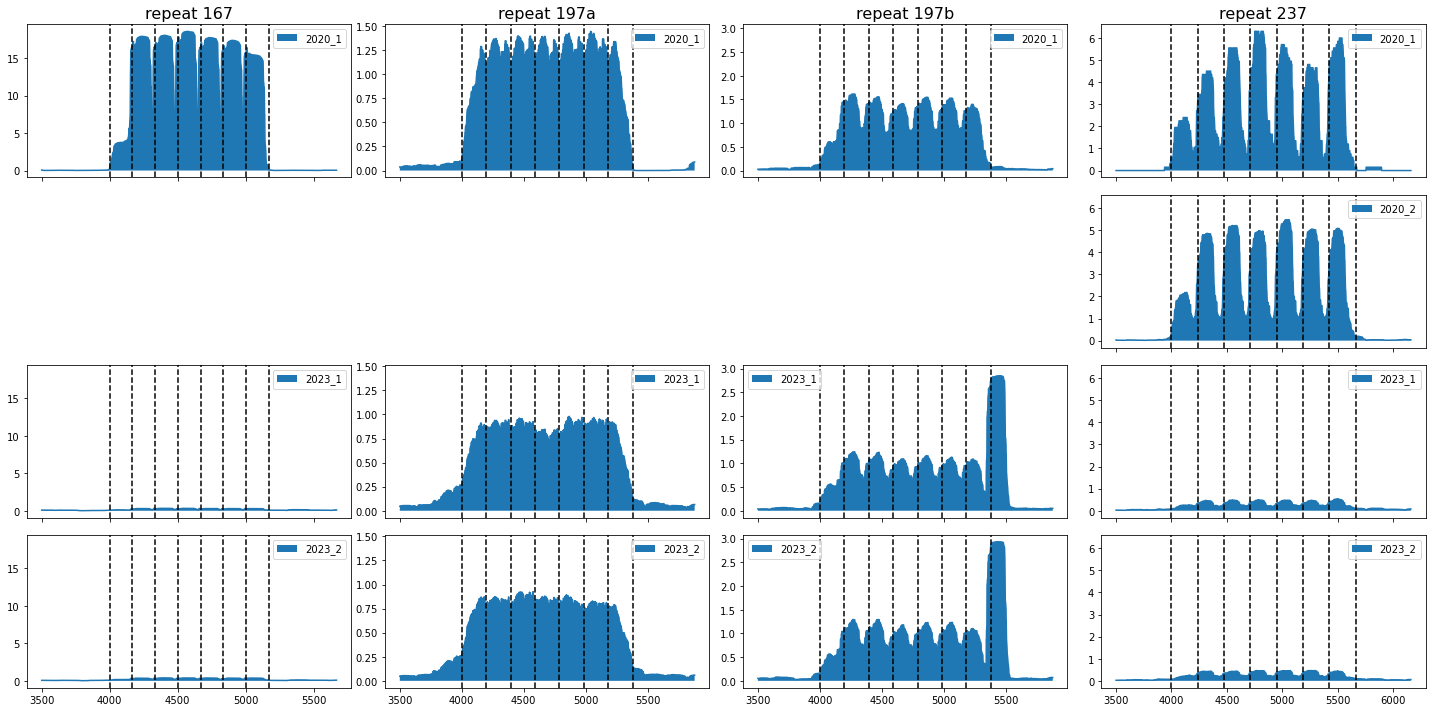

In [62]:
start = 3500
rstart = 4000
signals = np.array([[mnase2020_167_v3,   mnase2020_197a_v3,      mnase2020_197b_v3,      mnase2020_237_1_v3],
                    [None,               None,                   None,                   mnase2020_237_2_v3],
                    [mnase2023_167_1_v3, mnase2023_197a_1_v3,    mnase2023_197b_2_v3,    mnase2023_237_1_v3],
                    [mnase2023_167_2_v3, mnase2023_197a_2_v3,    mnase2023_197b_1_v3,    mnase2023_237_2_v3]])
labels = ['2020_1', '2020_2', '2023_1', '2023_2']
repeats = ['167', '197a', '197b', '237']
fig, axes = plt.subplots(4, 4, figsize=(20, 10), facecolor='w', layout='tight', sharex='col', sharey='col')

for i in range(4):
    axes[0, i].set_title(f'repeat {repeats[i]}', fontsize=16)
    for j in range(4):
        ax = axes[i, j]
        signal = signals[i, j]
        label = labels[i]
        rid = repeats[j]
        rlen = int(rid[:3])
        stop = rstart + rlen * 7 + (4000-start)
        if signal is not None:
            ax.plot(np.arange(start, stop), signal[f'{rid}_7_4kbrf'][start:stop])
            ax.fill_between(np.arange(start, stop), signal[f'{rid}_7_4kbrf'][start:stop], label=label)
            # ax.plot(np.arange(rstart, rstop), signal[f'{rid}_7_4kbrf'][rstart:rstop])
            # ax.fill_between(np.arange(rstart, rstop), signal[f'{rid}_7_4kbrf'][rstart:rstop], label='repeat', color=colors[1])
            for reps in range(0, 8):
                ax.axvline(rstart + reps*rlen, color='k', linestyle='--')
            ax.legend()
        else:
            ax.set_axis_off()

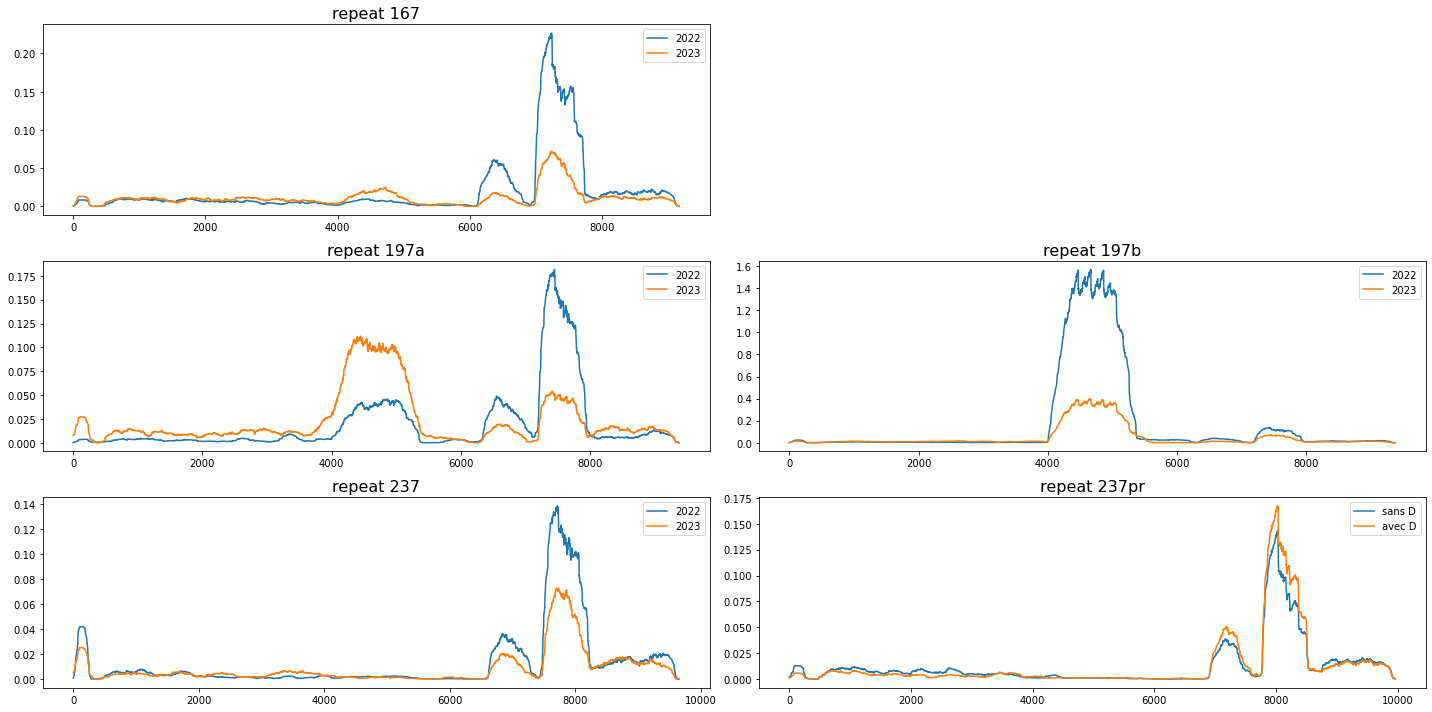

In [27]:
start = 0
stop = 12_000

fig, axes = plt.subplots(3, 2, figsize=(20, 10), facecolor='w', layout='tight')
col_idx = 0

axes[0, 0].set_title('repeat 167', fontsize=16)
axes[0, 0].plot(rna2022_167['167_7_4kbrf'][start:stop], label='2022')
axes[0, 0].plot(rna2023_167['167_7_4kbrf'][start:stop], label='2023')
axes[0, 0].legend()

axes[0, 1].set_axis_off()

axes[1, 0].set_title('repeat 197a', fontsize=16)
axes[1, 0].plot(rna2022_197a['197a_7_4kbrf'][start:stop], label='2022')
axes[1, 0].plot(rna2023_197a['197a_7_4kbrf'][start:stop], label='2023')
axes[1, 0].legend()

axes[1, 1].set_title('repeat 197b', fontsize=16)
axes[1, 1].plot(rna2022_197b['197b_7_4kbrf'][start:stop], label='2022')
axes[1, 1].plot(rna2023_197b['197b_7_4kbrf'][start:stop], label='2023')
axes[1, 1].legend()

axes[2, 0].set_title('repeat 237', fontsize=16)
axes[2, 0].plot(rna2022_237['237_7_4kbrf'][start:stop], label='2022')
axes[2, 0].plot(rna2023_237['237_7_4kbrf'][start:stop], label='2023')
axes[2, 0].legend()

axes[2, 1].set_title('repeat 237pr', fontsize=16)
axes[2, 1].plot(rna2022_237sansD['237pr_7_4kbrf'][start:stop], label='sans D')
axes[2, 1].plot(rna2022_237D['237pr_7_4kbrf'][start:stop], label='avec D')
axes[2, 1].legend()

Text(0.5, 0.98, 'repeat237pr: fragments between 140 and 170bp')

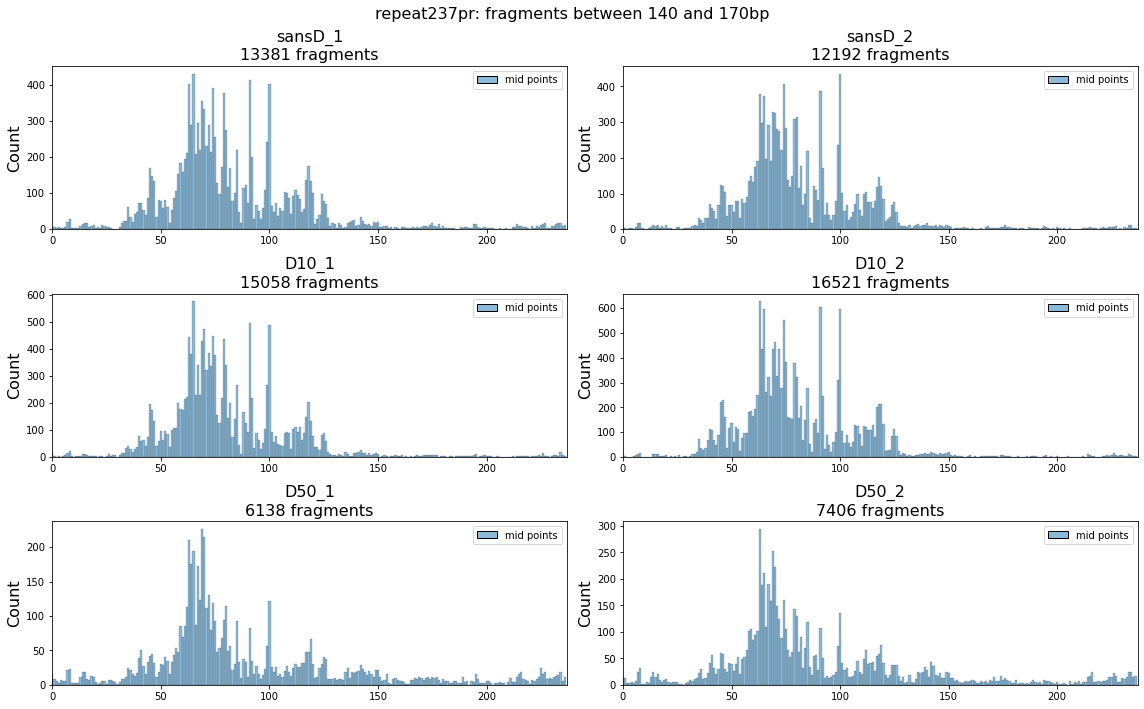

In [37]:
bam_files = [
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_167_1_lib406963_6879_2_101bp_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1971_1_lib402285_6844_1_101bp_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_1972_1_lib402286_6844_1_101bp_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6888_1_101bp_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNases_06_2020/NG-25315_237_1_lib406964_6879_2_101bp_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_1_lib713576_10294_1_101bp_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_101bp_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_1_lib713578_10294_1_101bp_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_1_22_2_lib713579_10294_1_101bp_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_1_lib713580_10294_1_101bp_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_197_2_27_2_lib713581_10294_1_101bp_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_1_lib713582_10294_1_101bp_max250.sorted.bam',
    # '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_237_44_2_lib713583_10294_1_101bp_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_1_lib554809_7856_3_101bp_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237_2_lib554810_7856_3_101bp_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_1_lib554811_7856_3_101bp_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D10_2_lib554812_7856_3_101bp_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_1_lib554813_7856_3_101bp_max250.sorted.bam',
    '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_03_2022/NG-29037_237D50_2_lib554814_7856_3_101bp_max250.sorted.bam'
    ]
suffixes = ['sansD_1', 'sansD_2', 'D10_1', 'D10_2', 'D50_1', 'D50_2']
repid = '237pr'
minfragsize, maxfragsize = 140, 170
repsize = int(repid[:3])
start = 4000
if repid[-2:] == 'pr':
    start += 298
fig, axes = plt.subplots(3, 2, figsize=(16, 10), facecolor='w', layout='tight')
for bam_file, suffix, ax in zip(bam_files, suffixes, axes.flatten()):
    with pysam.AlignmentFile(bam_file, 'rb') as f:
        coords = []
        for read in f.fetch(contig=f'{repid}_7_4kbrf'):
            if (not read.is_reverse
                and read.is_proper_pair
                and read.template_length >= minfragsize
                and read.template_length <= maxfragsize):
                coords.append(read.reference_start + read.template_length // 2)
    coords = np.array(coords)
    rep_coords = (coords[(coords >= start) & (coords < start + repsize*7)] - start) % repsize

    sns.histplot(pd.DataFrame(rep_coords, columns=['mid points']), discrete=True, ax=ax)
    ax.set_title(f'{suffix}\n{len(rep_coords)} fragments', fontsize=16)
    ax.set_xlim(0, repsize)
fig.suptitle(f'repeat{repid}: fragments between {minfragsize} and {maxfragsize}bp', fontsize=16)

In [40]:
bam_file = '/home/alex/shared_folder/JB_seqdes/Projet_Julien/MNase_08_2023/NG-34039_167_4_2_lib713577_10294_1_101bp_max250.sorted.bam'
with pysam.AlignmentFile(bam_file, 'rb') as f:
    tlens = []
    for read in f.fetch():
        if read.is_read1:
            if read.is_proper_pair:
                tlens.append(abs(read.template_length))
            else:
                tlens.append(0)
print(np.sum(np.array(tlens) == 0) / len(tlens))
print(np.sum(np.array(tlens) > 0) / len(tlens))

0.06997845465855339
0.9300215453414467


In [239]:
from deeptools.getFragmentAndReadSize import get_read_and_fragment_length
print(get_read_and_fragment_length(bam_file, numberOfProcessors=1))

({'sample_size': 5237, 'min': 0.0, 'qtile25': 0.0, 'mean': 55.09948443765514, 'median': 0.0, 'qtile75': 138.0, 'max': 250.0, 'std': 71.59975524428974, 'mad': 0.0, 'qtile10': 0.0, 'qtile20': 0.0, 'qtile30': 0.0, 'qtile40': 0.0, 'qtile60': 0.0, 'qtile70': 129.0, 'qtile80': 145.0, 'qtile90': 154.0, 'qtile99': 191.0}, {'sample_size': 5237, 'min': 50.0, 'qtile25': 50.0, 'mean': 50.0, 'median': 50.0, 'qtile75': 50.0, 'max': 50.0, 'std': 0.0, 'mad': 0.0, 'qtile10': 50.0, 'qtile20': 50.0, 'qtile30': 50.0, 'qtile40': 50.0, 'qtile60': 50.0, 'qtile70': 50.0, 'qtile80': 50.0, 'qtile90': 50.0, 'qtile99': 50.0})
